In [1]:

colors = {
    'Build': '#1f77b4',
    'GUI': '#2ca02c',
    'Documentation': '#6e750e',
    'OS Dev': '#ff7f0e',
    'Network': '#7f7f7f',
    'Other': '#17becf',
    'Testing': '#cea2fd',
    'Computing': '#ae7181',  
    'Database': '#029386',
    'File Handling': '#9467bd',
    'Serializing': '#d62728',
    'Multi Media': '#d1b26f',
    'Cryptography': '#8c564b',
    'Image': '#c20078',
    'Command Line': '#bcbd22',
    'Logging': '#e377c2',
    'Compilers': '#17becf',
    'AI': '#6e750e',
    'Font': '#7f7f7f'
}

total mig 2171


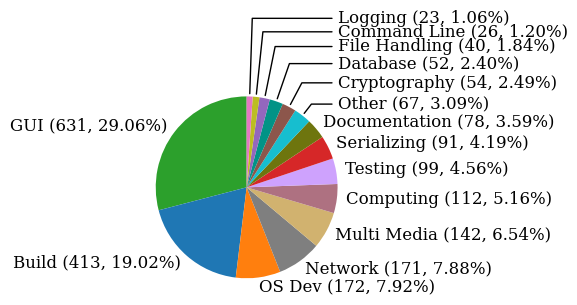

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datautil import *

def draw_domain_dist(df, rule=False):
    small_label_num = 6
    internal = 2
    print('total mig', len(df))

    domain_df = df['domain'].value_counts().reset_index()
    domain_df.columns = ['domain', 'num']
    labels = domain_df['domain']
    data = domain_df['num']

    labels = [
        f"{label[0].upper() + label[1:]} ({x}, {100 * x / sum(data):.2f}%)"
        for label, x in zip(labels, data)
    ]
    fig, ax = plt.subplots(figsize=(8, 4))
    patches, texts = ax.pie(
        [x for x in data],
        labels=labels[0:len(labels) - small_label_num] +
        [""] * small_label_num,
        shadow=False,
        startangle=90,
        labeldistance=1.1,
        pctdistance=0.8,
        colors=[colors[label[0].upper() + label[1:]] for label in domain_df['domain']])
    plt.setp(texts, fontsize=12)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")
    for i in range(-small_label_num, 0):
        p = patches[i]
        ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i],
                    xy=(x, y),
                    xytext=(1 * np.sign(x), (internal + 0.14 * i) * y),
                    horizontalalignment=horizontalalignment,
                    **kw, fontsize=12)
    plt.subplots_adjust(left=0.5, right=0.8, top=0.6, bottom=0.1)
    if rule:
        fig.savefig(f"fig/rule_domain.pdf",
                bbox_inches="tight")
    else:
        fig.savefig(f"fig/commit_domain.pdf",
                bbox_inches="tight")


plt.rcParams['font.family'] = 'serif'
mig_df = get_mig("c")
draw_domain_dist(mig_df, rule=False)
# draw_domain_dist(mig_df, rule=True)


In [ ]:
df = get_mig("c")
# 定义标签

get_sankey(df, 'build')
get_sankey(df, 'GUI')
get_sankey(df, 'OS Dev')
get_sankey(df, 'testing')

----------
build
autotools-dev [156] dh-autoreconf
autoconf [47] dh-autoreconf
autotools-dev [39] cmake
dpatch [33] quilt
autotools-dev [14] meson
cdbs [13] dh-r
hardening-wrapper [12] dpkg-dev
cdbs [10] quilt
hardening-includes [9] dpkg-dev
----------
GUI
libqt4-dev [124] qtbase5-dev
libqt4-dev [61] qttools5-dev-tools
qt5-default [46] qtbase5-dev
libqt4-dev [45] qttools5-dev
libhandy-1 [23] libadwaita-1
xlibs-dev [23] libx11-dev
xlibs-dev [14] x-dev
x-dev [13] x11proto-core-dev
xlibs-dev [11] libxt-dev
----------
OS Dev
qemu-system [14] qemu-kvm
uavcan [13] libuavcan
qemu-utils [9] qemu-kvm
libsystemd-login-dev [8] libsystemd-dev
eos-parental-controls-0 [6] malcontent-0
libsystemd-daemon-dev [6] libsystemd-dev
libcanberra-gtk3 [6] libcanberra
liblpc40xx [6] libhal-lpc40xx
libhybris-dev [5] libhardware-dev
----------
testing
google-benchmark [20] benchmark
catch2 [17] gtest
gtest [10] gtest_main
gtest [10] catch2
doctest [8] catch2
catch2 [7] doctest
gtest [5] doctest
cppbenchmark [2] 